In [1]:
from ggc.graphs import *

In [2]:
dataset = "aminer"

### Load dataset

In [3]:
X, Y, nodelist_mapping = load_data(dataset=dataset)
X = preprocess_features(X)

Loading aminer dataset...
Samples=2072,Features=500,Labels=7


### Construct CkNN graph from data features

In [4]:
%%time
A = cknn_graph(X=X, delta=1, k=199)

CPU times: user 572 ms, sys: 78.7 ms, total: 650 ms
Wall time: 427 ms


In [5]:
# Add an mst to make the graph have a single connected component
A = A + mst_graph(X=X)
A[A > 0] = 1

In [6]:
show_info(A)

Nodes=2072,Edges=82646,Density=0.03852


### Visualize the constructed CkNN graph

In [7]:
G = nx.Graph(A)
df = pd.DataFrame()
df["class"] = list(np.nonzero(Y)[1] + 1)

colors = sns.color_palette("Set1", n_colors=len(set(df["class"])), desat=1.0)
node_colors = []
for node in G.nodes():
    node_colors.append(colors[int(df.loc[node]["class"])-1])

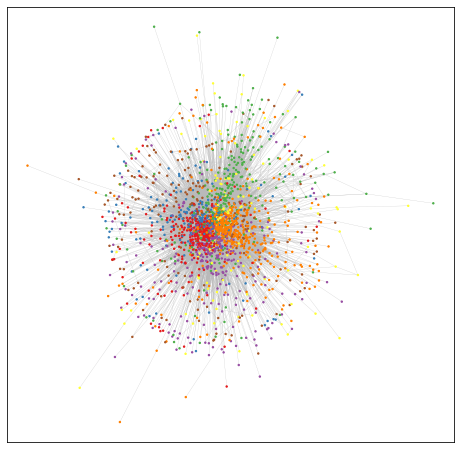

In [8]:
# Layout: spring. Node color: ground truth class label.
fig, ax = plt.subplots(1, 1, figsize=(8,8))
nx.draw_networkx(G,pos=nx.spring_layout(G, seed=123),
                 node_color=node_colors,
                 node_size=2,
                 with_labels=False,
                 edge_color="#b9b9b9",
                 width=0.2,
                 ax=ax)

frame1 = plt.gca()
frame1.axes.get_xaxis().set_visible(False)
frame1.axes.get_yaxis().set_visible(False)
plt.show()

### Save the constructed CkNN graph

In [9]:
# save_graph(adj=A, nodelist_mapping=nodelist_mapping, filename="data/{}_cknn_demo.csv".format(dataset))